In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../data/feedback_cleaned.csv")
df.head()

,text,label,clean_text,tokens,label_encoded
0,The app crashes every time I upload an image.,technical_issue,the app crashes every time i upload an image,"['app', 'crashes', 'time', 'upload', 'image']",4
1,I really love the new dashboard layout!,praise,i really love the new dashboard layout,"['love', 'new', 'dashboard', 'layout']",2
2,Please add dark mode to the app.,feature_request,please add dark mode to the app,"['add', 'dark', 'mode', 'app']",1
3,I'm very disappointed with your customer service.,complaint,im very disappointed with your customer service,"['m', 'disappointed', 'customer', 'service']",0
4,How do I change my subscription plan?,question,how do i change my subscription plan,"['change', 'subscription', 'plan']",3


In [4]:
X = df['clean_text']
y = df['label_encoded']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.62      0.83      0.71         6
           2       1.00      0.58      0.74        12
           3       1.00      0.83      0.91         6
           4       0.60      0.75      0.67         4

    accuracy                           0.70        30
   macro avg       0.69      0.70      0.66        30
weighted avg       0.82      0.70      0.73        30



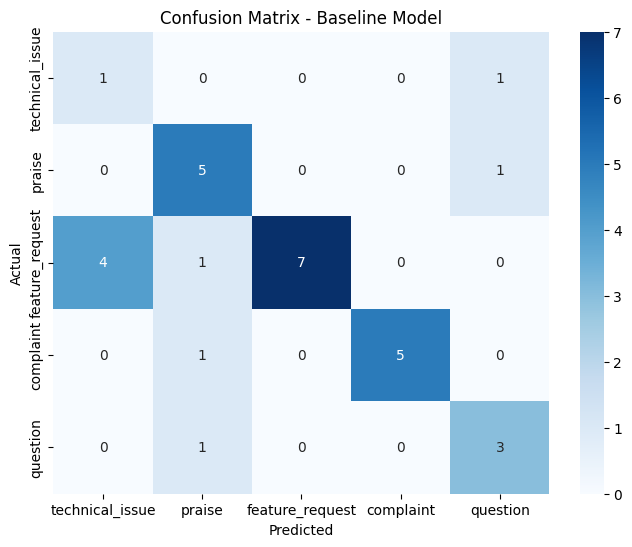

In [9]:
cm = confusion_matrix(y_test, y_pred)
labels = df['label'].unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Model')
plt.show()